In [2]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import scipy.stats as stats

#LOAD THE DATASET USING pd.read_excel() WITH LOWERCASE COLUMN NAMES
df = pd.read_excel('Superstore - Copy.xlsx')

#DEFINE A FUNCTION FOR CALCULATING PROBABILITY
def calculate_probability(event_count, total_count):
    return event_count / total_count

#HYPOTHETICAL SCENARIO 1: BOOSTING PROFITS

#TOP-SELLING CATEGORIES
top_categories = df['category'].value_counts().head(2).index.tolist()

#SALES VS. DISCOUNT
discount_profit_corr = df['sales'].corr(df['profit'])

#CUSTOMER SEGMENT
top_segments = df['segment'].value_counts().head(2).index.tolist()

#CALCULATE PROBABILITIES
probability_profitable_segment = calculate_probability(len(df[df['segment'].isin(top_segments)]), len(df))
probability_high_profit_category = calculate_probability(len(df[df['category'].isin(top_categories)]), len(df))

print("Hypothetical Scenario 1: Boosting Profits")
print("1. Focus on the top-selling categories:", top_categories)
print("   - Analyze high-margin products within these categories.")

print("2. Analyze the correlation between sales and profit:", discount_profit_corr)
print("   - Optimize discounts to boost both sales and profit.")

print("3. Identify profitable customer segments:", top_segments)
print("   - Tailor marketing strategies for these segments.")

print(f"   - Probability of a sale from a high-profit category: {probability_high_profit_category:.2%}")
print(f"   - Probability of a sale from a profitable segment: {probability_profitable_segment:.2%}")
print()

#HYPOTHETICAL SCENARIO 2: REDUCING SHIPPING COST

#SHIPPING MODES
shipping_modes = df['ship mode'].value_counts().index.tolist()

#CALCULATE PROBABILITY FOR EACH SHIPPING MODE
probabilities = [calculate_probability(len(df[df['ship mode'] == mode]), len(df)) for mode in shipping_modes]
print("Hypothetical Scenario 2: Reducing Shipping Costs")
print("1. Evaluate cost-effectiveness of shipping modes:", shipping_modes)
print("   - Optimize usage of economical shipping methods.")
for i, mode in enumerate(shipping_modes):
	print(f"   - Probability of choosing {mode}: {probabilities[i]:.2%}")
print()

#HYPOTHETICAL SCENARIO 3: INCREASING SALES IN LOW-PERFORMING REGIONS

#MARKET RESEARCH
low_sales_regions = df.groupby('region')['sales'].mean().idxmin()

#CALCULATE AVERAGE SALES FOR EACH REGION
average_sales_by_region = df.groupby('region')['sales'].mean().to_dict()
print("Hypothetical Scenario 3: Increasing Sales in Low-Performing Regions")
print(f"1. Conduct market research in {low_sales_regions} to understand local preferences and needs.")

#LOCAL MARKETING
print("2. Implement location-specific marketing campaigns to increase brand visibility and attract more customers.")

#CALCULATE PROBABILITIES OF SALES IN EACH REGION
probabilities = [calculate_probability(len(df[df['region'] == region]), len(df)) for region in df['region'].unique()]
for region in df['region'].unique():
	print(f"   - Probability of a sale in {region}: {probabilities[list(df['region'].unique()).index(region)]:.2%}")
print()

#HYPOTHETICAL SCENARIO 4: CUSTOMER SATISFACTION IMPROVEMENT

#CALCULATE PROBABILITIES
probability_high_delivery_time_region = calculate_probability(len(df[df['region'] == 'West']), len(df))
probability_low_rated_product = calculate_probability(len(df[df['quantity'] > 1]), len(df))

print("Scenario 4: Customer Satisfaction Improvement")
print("1. Analyze customer feedback and address common issues to enhance satisfaction.")
print("2. Evaluate delivery times for different regions and shipping modes.")
print("   - Reduce delivery times in regions with longer delivery durations.")
print("3. Assess product quality based on customer reviews and ratings.")
print("   - Identify low-rated products and work on improving their quality.")
print("4. Segment customers based on their purchase history and preferences.")
print("   - Tailor promotions and communication to their specific needs.")
print(f"   - Probability of a customer in the West region: {probability_high_delivery_time_region:.2%}")
print(f"   - Probability of a customer buying more than one product: {probability_low_rated_product:.2%}")


Hypothetical Scenario 1: Boosting Profits
1. Focus on the top-selling categories: ['Office Supplies', 'Furniture']
   - Analyze high-margin products within these categories.
2. Analyze the correlation between sales and profit: 0.7874705783917682
   - Optimize discounts to boost both sales and profit.
3. Identify profitable customer segments: ['Consumer', 'Corporate']
   - Tailor marketing strategies for these segments.
   - Probability of a sale from a high-profit category: 81.53%
   - Probability of a sale from a profitable segment: 82.15%

Hypothetical Scenario 2: Reducing Shipping Costs
1. Evaluate cost-effectiveness of shipping modes: ['Standard Class', 'Second Class', 'First Class', 'Same Day']
   - Optimize usage of economical shipping methods.
   - Probability of choosing Standard Class: 59.73%
   - Probability of choosing Second Class: 19.44%
   - Probability of choosing First Class: 15.40%
   - Probability of choosing Same Day: 5.44%

Hypothetical Scenario 3: Increasing Sales 

In [4]:
df.head()

,row id,customer id,order date,shipping date,ship mode,customer id.1,customer name,segment,country,city,...,postal code,region,product id,category,sub category,product name,sales,quantity,discount,profit
0,1,CA2016152156,2023-07-01,2021-07-08,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURBO10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA2016152156,2022-07-03,2023-05-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURCH10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820
2,3,CA2016138688,2021-08-16,2021-11-02,Second Class,DV13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFFLA10000240,Office Supplies,Labels,SelfAdhesive Address Labels for Typewriters by...,14.6200,2,0.00,6.8714
3,4,US2015108966,2021-04-14,2022-12-21,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,FURTA10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,383.0310
4,5,US2015108966,2021-01-02,2021-08-26,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFFST10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
def ci_finder(excel_name,target_ci_cols):   
    import pandas as pd

    df = pd.read_excel('Superstore - Copy.xlsx')
    
    def ci(data):
        import numpy as np
        import scipy.stats as st
        
        #data=df['profit']
        
        #CREATE 95% CONFIDENCE INTERVAL FOR POPULATION MEAN WEIGHT
        ci_ninty_five=st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
        ci_ninty_seven=st.norm.interval(alpha=0.97, loc=np.mean(data), scale=st.sem(data))
        ci_ninty_nine=st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))
        print('95%',ci_ninty_five)
        print('97%',ci_ninty_seven)
        print('99%',ci_ninty_nine)
    target_ci_cols=target_ci_cols.split(',')
    #target_ci_cols=['profit','quantity','discount','sales']
    for i in target_ci_cols:
        print(f'Confidence interval for {i.title()}')
        ci(df[i])
        print('*'*30)
        
excel_name=input('Enter your excel file name here: ')
target_ci_cols=input('Enter name of columns on which you want to find CI for: ')
ci_finder(excel_name,target_ci_cols)

Enter your excel file name here: Superstore - Copy.xlsx
Enter name of columns on which you want to find CI for: profit,sales
Confidence interval for Profit
95% (55.439340960627824, 64.39384450483763)
97% (54.95933787228266, 64.8738475931828)
99% (54.03248649153544, 65.80069897393003)
******************************
Confidence interval for Sales
95% (217.60425217796072, 242.0504541884056)
97% (216.29382191173886, 243.36088445462747)
99% (213.76347548041073, 245.8912308859556)
******************************


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2536363902.py:13: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2536363902.py:14: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2536363902.py:15: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.



In [2]:
#Import tkinter library
import tkinter as tk
from tkinter import filedialog as fd 

#Create an instance of tkinter frame or window
win= tk.Tk()

#Set the geometry of tkinter frame
win.geometry("300x150")
def callback():
    global excel_name
    excel_name= fd.askopenfilename() 
    print(excel_name)

def ci_finder(excel_name,target_ci_cols):
    import pandas as pd
    df=pd.read_excel('Superstore - Copy.xlsx')

    def ci(data):
        import numpy as np
        import scipy.stats as st

        #data=df['profit']

        #create 95% confidence interval for population mean weight
        ci_ninty_five=st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
        ci_ninty_seven=st.norm.interval(alpha=0.97, loc=np.mean(data), scale=st.sem(data))
        ci_ninty_nine=st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))
        print('95%',ci_ninty_five)
        print('97%',ci_ninty_seven)
        print('99%',ci_ninty_nine)
    
#target_ci_cols=target_ci_cols.split(',')
    
#target_ci_cols=['profit','quantity','discount','sales']
    for i in target_ci_cols:
        print(f'Confidence Interval for {i.title()}')
        ci(df[i])
        print('*'*30)
        
def main_start(): 
    e_text=entry.get()
    target_ci_cols=e_text.split(',')
    ci_finder(excel_name,target_ci_cols)   
    
browse_btn=tk.Button(text='Browse', command=callback)
browse_btn.place(x=120,y=10)

#Create an Entry Widget
entry= tk.Entry(win,font=('Century 12'),width=25)
entry.place(x=40,y=60)

start_btn=tk.Button(win,text='Start',command=main_start)
start_btn.place(x=130,y=110)
win.mainloop()

# REGION KA PROGRAM

In [2]:
#IMPORTING LIBRARIES
import pandas as pd

#EXPLORING THE DATA
df = pd.read_excel('Superstore - Copy.xlsx')

#DATA OF REGION AND SALES ANALYSIS
data = pd.DataFrame({'Region': df['region'], 'Sales': df['sales']})
region_avg = data.groupby('Region')['Sales'].mean()

print(region_avg)

Region
Central    215.774303
East       238.336110
South      241.803645
West       226.388807
Name: Sales, dtype: float64


In [11]:
#IMPORTING LIBRARIES
import pandas as pd

#EXPLORING THE DATA
df = pd.read_excel('Superstore - Copy.xlsx')

#DATA OF REGION, SALES AND CATEGORY ANALYSIS
average_sales = df.groupby(['region', 'category'])['sales'].mean()
print(average_sales)

region   category       
Central  Furniture          340.534644
         Office Supplies    117.392298
         Technology         405.753124
East     Furniture          346.574383
         Office Supplies    120.044425
         Technology         495.278469
South    Furniture          353.309289
         Office Supplies    126.282727
         Technology         507.753952
West     Furniture          357.302325
         Office Supplies    116.477638
         Technology         420.418489
Name: sales, dtype: float64


In [13]:
df

,row id,customer id,order date,shipping date,ship mode,customer id.1,customer name,segment,country,city,...,postal code,region,product id,category,sub category,product name,sales,quantity,discount,profit
0,1,CA2016152156,2023-07-01,2021-07-08,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURBO10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA2016152156,2022-07-03,2023-05-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURCH10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820
2,3,CA2016138688,2021-08-16,2021-11-02,Second Class,DV13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFFLA10000240,Office Supplies,Labels,SelfAdhesive Address Labels for Typewriters by...,14.6200,2,0.00,6.8714
3,4,US2015108966,2021-04-14,2022-12-21,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,FURTA10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,383.0310
4,5,US2015108966,2021-01-02,2021-08-26,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFFST10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,9986,CA2014110422,2022-04-25,2021-11-15,Second Class,TB21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FURFU10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9986,9987,CA2017121258,2022-06-29,2022-04-09,Standard Class,DB13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FURFU10000747,Furniture,Furnishings,Tenex B1RE Series Chair Mats for Low Pile Carpets,91.9600,2,0.00,15.6332
9987,9988,CA2017121258,2023-06-09,2023-02-18,Standard Class,DB13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TECPH10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9988,9989,CA2017121258,2022-04-01,2022-01-22,Standard Class,DB13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFFPA10004041,Office Supplies,Paper,"Its Hot Message Books with Stickers 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [15]:
import numpy as np
import pandas as pd
df=pd.read_excel ('Superstore - Copy.xlsx')

                  
region={'south':df[df['region']=='South']['sales'],
'central':df[df['region']=='Central']['sales'],
'east':df[df['region']=='East']['sales'], 
'west':df[df['region']=='West']['sales']}

print('South Average', np.around(np.mean(region['south']),2)) 
print('East Average',np.around(np.mean(region['east']),2))
print('Central Average',np.around (np.mean (region['central']),2)) 
print('West Average', np.around (np.mean(region['west']),2))

print('Null Hyp: There is no significant difference in average sales among different regions') 
print('Alt Hyp: There is a significant difference in average sales among different regions')

import scipy.stats as stats

region.values()

f_value,p_value=stats.f_oneway(*region.values())

alpha=0.05

#Insights:
print("\nInsights: ")
if p_value < alpha:
    print ("the null hypothesis is rejected.")
    print("There is a significant difference in average sales among different regions.")
else :
    print("The null hypothesis is not rejected.")
    print("Average sales across regions are not significantly different.")

#Conclusion:
print("\nConclusion:")
print("Understanding regional variations in sales is crucial for targeted strategies.")

South Average 241.8
East Average 238.34
Central Average 215.77
West Average 226.39
Null Hyp: There is no significant difference in average sales among different regions
Alt Hyp: There is a significant difference in average sales among different regions

Insights: 
The null hypothesis is not rejected.
Average sales across regions are not significantly different.

Conclusion:
Understanding regional variations in sales is crucial for targeted strategies.


In [16]:
from scipy import stats

group_a = [32, 36, 28, 29, 31]
group_b = [37, 41, 39, 32, 35]

f_stat, p_value = stats.f_oneway(group_a, group_b)

if p_value < 0.05:
    print('The means are significantly different.')
else:
    print('No significant difference found.')

The means are significantly different.


In [17]:
from scipy import stats

group_a = [32, 36, 28, 29, 31]
group_b = [37, 41, 39, 32, 35]
group_c = [42, 45, 40, 38, 41]

f_stat, p_value = stats.f_oneway(group_a, group_b, group_c)

if p_value < 0.05:
    print('At least one group mean is significantly different.')
else:
    print('No significant difference among group means.')

At least one group mean is significantly different.


# SHIPMODE KA PROGRAM

In [18]:
import pandas as pd

In [19]:
df=pd.read_excel('Superstore - Copy.xlsx')

In [20]:
df['ship mode'].value_counts()

Standard Class    5967
Second Class      1942
First Class       1538
Same Day           543
Name: ship mode, dtype: int64

In [21]:
for i in df['ship mode'].unique():
    print(i)

Second Class
Standard Class
First Class
Same Day


In [22]:
print('Hypothesis Testing')
print()
import pandas as pd
df=pd.read_excel ('Superstore - Copy.xlsx')

                  
shipmode={'second_class':df[df['ship mode']=='Second Class']['sales'],
'standard_class':df[df['ship mode']=='Standard Class']['sales'],
'first_class':df[df['ship mode']=='First Class']['sales'], 
'same_day':df[df['ship mode']=='Same Day']['sales']}

print('Second Class Average', np.around(np.mean(shipmode['second_class']),2)) 
print('Standard Class Average',np.around(np.mean(shipmode['standard_class']),2))
print('First Class Average',np.around (np.mean (shipmode['first_class']),2)) 
print('Same Day Average', np.around (np.mean(shipmode['same_day']),2))

print('Null Hyp: There is no significant difference in average sales among different regions') 
print('Alt Hyp: There is a significant difference in average sales among different regions')

import scipy.stats as stats

shipmode.values()

f_value,p_value=stats.f_oneway(*shipmode.values())

alpha=0.05

#Insights:
print("\nInsights: ")
if p_value < alpha:
    print ("the null hypothesis is rejected.")
    print("There is a significant difference in average sales among different regions.")
else :
    print("The null hypothesis is not rejected.")
    print("Average sales across regions are not significantly different.")

#Conclusion:
print("\nConclusion:")
print("Understanding regional variations in sales is crucial for targeted strategies.")

Hypothesis Testing

Second Class Average 236.29
Standard Class Average 227.47
First Class Average 228.5
Same Day Average 236.4
Null Hyp: There is no significant difference in average sales among different regions
Alt Hyp: There is a significant difference in average sales among different regions

Insights: 
The null hypothesis is not rejected.
Average sales across regions are not significantly different.

Conclusion:
Understanding regional variations in sales is crucial for targeted strategies.


In [23]:
import scipy.stats as stats

shipmode.values()

f_value,p_value=stats.f_oneway(*shipmode.values())

In [24]:
print(f_value,p_value)

0.12052154231506133 0.9480604046522227


In [25]:
import pandas as pd

In [26]:
df=pd.read_excel('Superstore - Copy.xlsx')

In [27]:
seg_dict={}
for i in df['segment'].unique():
    print(i)
    print(round(np.mean(df[df['segment']==i]['profit']),2))
    seg_dict[i]=round(np.mean(df[df['segment']==i]['profit']),2)
    print('*'*30)

Consumer
58.59
******************************
Corporate
60.12
******************************
Home Office
63.43
******************************


In [28]:
print(seg_dict)

{'Consumer': 58.59, 'Corporate': 60.12, 'Home Office': 63.43}


In [29]:
import seaborn as sns

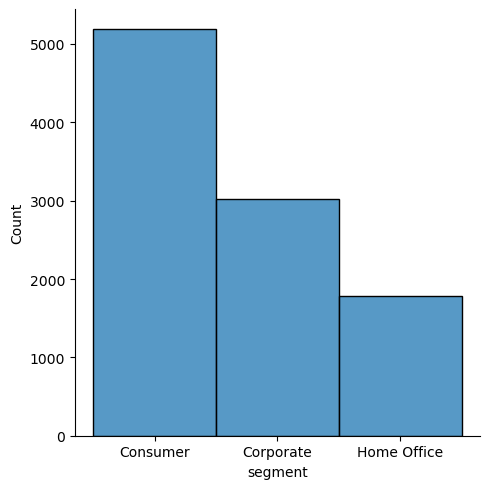

In [30]:
sns.displot(df['segment'])

In [31]:
for i in df['segment'].unique():
    print(i)
    print(round(np.mean(df[df['segment']==i]['profit']),2))
    print('*'*30)

Consumer
58.59
******************************
Corporate
60.12
******************************
Home Office
63.43
******************************


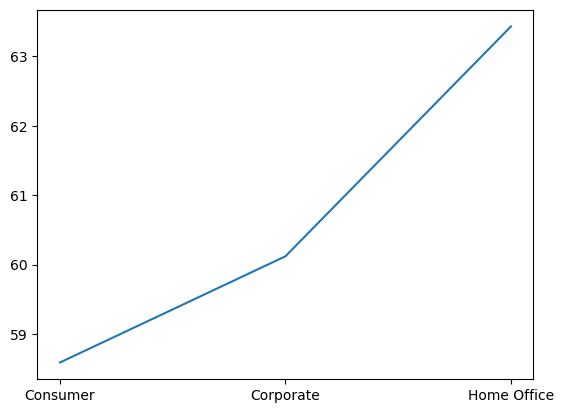

In [32]:
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(data=seg_dict.values(),index=seg_dict.keys(),columns=['Average']))

In [33]:
import numpy as np
np.around(np.mean(df[df['segment']=='Consumer']['profit']),2)

58.59

# HOW TO REPLACE A WORD

In [34]:
'hello world'.replace(' ',' new ')

'hello new world'

In [35]:
round(np.mean(df[df['segment']=='Consumer']['profit']),2)

58.59

In [36]:
segment={}
for i in df['segment'].unique():
    segment[i]=df[df['segment']==i]['profit']

In [ ]:
df

In [8]:
import numpy as np
import pandas as pd
df=pd.read_excel('Superstore - Copy.xlsx')

def significant_difference_in_average_acc_to_sales (col_name):
    print (f'HYPOTHESIS TESTING on {col_name.title()}')
    print()
    print('*'*30)
    dict_name=col_name.replace('','')
    
    dict_name={}
    for i in df[col_name].unique():
        #print(i)
        dict_name[i]=df[df[col_name]==i]['sales']

    for k in dict_name:
        print(f'{k} Average: {np.around (np.mean (dict_name [k]),2)}')

    print('*'*30)

    print (f'Null Hyp: There is no significant difference in average sales among different {col_name.title()}') 
    print(f'Alt Hyp: There is a significant difference in average sales among different {col_name.title()}')

    import scipy.stats as stats

    f_value,p_value=stats.f_oneway(*dict_name.values())

    alpha=0.05

    # Insights:
    print("\nInsights: ")
    if p_value < alpha:
        print (f"The null hypothesis is rejected.")
        print (f"There is a significant difference in average sales among different {col_name.title()}.")
    else:
        print("The null hypothesis is not rejected.")
        print (f"Average sales across {col_name.title()} are not significantly different.")

    # Conclusion:
    print("\nConclusion:")
    print(f"Understanding {col_name.title()} variations in sales is crucial for targeted strategies.")

significant_difference_in_average_acc_to_sales("segment")

HYPOTHESIS TESTING on Segment

******************************
Consumer Average: 223.67
Corporate Average: 233.82
Home Office Average: 240.97
******************************
Null Hyp: There is no significant difference in average sales among different Segment
Alt Hyp: There is a significant difference in average sales among different Segment

Insights: 
The null hypothesis is not rejected.
Average sales across Segment are not significantly different.

Conclusion:
Understanding Segment variations in sales is crucial for targeted strategies.


# VISUALISATION BY USING CUFFLINK

In [3]:
!pip install cufflinks

     ---------------------------------------- 81.7/81.7 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=b49dfbb3be4beaeda1d92caf9a1789dc0b8c1720472c4b8438fb415152ba62a1
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b1\8f\ec\b76ac80a14f3f5f59643cbc2eee7d78690b1bd158279f299dd
Successfully built cufflinks


In [1]:
import pandas as pd
df=pd.read_excel('Superstore - Copy.xlsx')

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
# FOR NOTEBOOKS
init_notebook_mode(connected=True)
# FOR OFFLINE USE
cf.go_offline()

# NUMERICAL
df['quantity'].iplot(kind='hist',bins=25)

# CATEGORY
df['category'].value_counts().iplot(kind='bar')